# Age Prediction From Facial Images
#### Author: Vivek Nambidi

### Importing all necessarry Libraries 

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array, mean, cov
from numpy.linalg import eig
from matplotlib.image import imread
from fnmatch import fnmatch
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from zipfile import ZipFile
from PIL import Image
from sklearn.impute import SimpleImputer
import csv

%matplotlib inline

### Function to loop through all images in the directories and read the images into an array

In [2]:
# 100x100 images flattened = 10,000 and 60327 images. Placeholder array for loading images
size = (60327, 10000)
# allocate a matrix to load images into.
images = np.empty(size)

# load the images into a 60327 x 10000 dim matrix.
def load_image_3(image_arr, paths):
    image_file = './wiki_labeled.zip'
    n = 0
    m = 1
    with ZipFile(image_file, 'r') as zip:
        for e in paths:
            file = zip.open('wiki_labeled/' + e)
            img = Image.open(file)
            ar = np.array(img).flatten()
            image_arr[n:m, :] = ar
            n += 1
            m += 1

In [3]:
#Load the meta data file

def get_metaData(matfile):

    metaData = loadmat(matfile,squeeze_me=True, struct_as_record=True)
    # Extract full path from the structered data
    full_path = metaData['wiki_labeled']['full_path'].item(0)
    # Extract age field from the structered data
    age = metaData['wiki_labeled']['age'].item(0)
    
    return full_path, age


### Provide full and correct path to the Directories named 00-99 containing all the images in the below code

In [4]:
full_path , age = get_metaData("wiki_labeled.mat")

In [5]:
age = pd.DataFrame(age).values

In [6]:
#images = load_image_2(full_path)

In [7]:
load_image_3(images,full_path)

In [8]:
# Replace the missing Values with the mean of the feature
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer = imputer.fit(images)
images = imputer.transform(images)

In [9]:
print("\nEntire 2D Image array:\n",images)


Entire 2D Image array:
 [[255. 255. 255. ...  65.  60.  54.]
 [102. 100.  99. ...  27.  27.  29.]
 [177. 175. 173. ... 194. 201. 207.]
 ...
 [132. 132. 132. ... 126. 164. 217.]
 [  0.   0.   0. ...   0.   0.   0.]
 [ 48.  53.  54. ...  31.  30.  27.]]


In [10]:
print("[INFO]- Images")
print("\nShape of Array/Matrix of all the images:",images.shape)
print("\nLength of Array/Matrix of all the images:",len(images))
print("\nDimension of Array/Matrix of all the images:",images.ndim)

[INFO]- Images

Shape of Array/Matrix of all the images: (60327, 10000)

Length of Array/Matrix of all the images: 60327

Dimension of Array/Matrix of all the images: 2


In [11]:
height, width = 100, 100

In [12]:
print("AGE_True Value:\n",age)

AGE_True Value:
 [[27.74611872]
 [59.58219178]
 [30.69680365]
 ...
 [40.09703196]
 [29.1326484 ]
 [53.64360731]]


#### Split the data set into test and train (20%-80%)

In [113]:
train_Data,test_Data,train_Actual,test_Actual = train_test_split(images, age, test_size=0.2, random_state=100,shuffle = True)

In [114]:
# Function to plot Images: 
def plot_Faces(images,height,width, rows, columns):
    fig=plt.figure(figsize=(10,10))
    for index in range(len(images)):
        img = images[index].reshape(height,width)
        fig.add_subplot(rows,columns,1+index)
        plt.imshow(img,cmap=plt.cm.gray)
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.show()

In [115]:
print("[INFO]- training_Data")
print("\nShape of Array/Matrix of all the training_Data:",train_Data.shape)
print("\nLength of Array/Matrix of all the training_Data:",len(train_Data))
print("\nDimension of Array/Matrix of all the training_Data:",train_Data.ndim)

[INFO]- training_Data

Shape of Array/Matrix of all the training_Data: (48261, 10000)

Length of Array/Matrix of all the training_Data: 48261

Dimension of Array/Matrix of all the training_Data: 2


In [116]:
print("[INFO]- test Data")
print("\nShape of Array/Matrix of all the test_Data:",test_Data.shape)
print("\nLength of Array/Matrix of all the test_Data:",len(test_Data))
print("\nDimension of Array/Matrix of all the test_Data:",test_Data.ndim)

[INFO]- test Data

Shape of Array/Matrix of all the test_Data: (12066, 10000)

Length of Array/Matrix of all the test_Data: 12066

Dimension of Array/Matrix of all the test_Data: 2


### Compute the Mean Face for training data

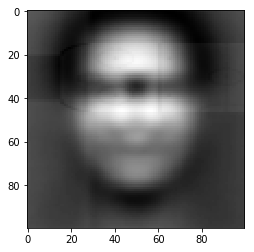

In [117]:
meanImage_train = np.zeros((1,height*width))

for img in train_Data:
    meanImage_train = np.add(meanImage_train,img)    
meanImage_train = np.divide(meanImage_train,float(len(train_Data))).flatten()
plt.imshow(meanImage_train.reshape(height,width), cmap = 'gray')
plt.show()


In [118]:
print("\n [INFO] Mean: Train")
print("\nlength:",len(meanImage_train))
print("\nno:of:dimensions",meanImage_train.ndim)
print("\nshape:",meanImage_train.shape)


 [INFO] Mean: Train

length: 10000

no:of:dimensions 1

shape: (10000,)


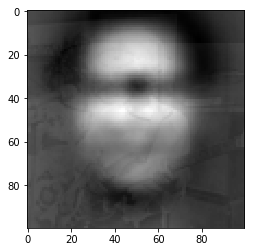

In [119]:
meanImage_test = np.zeros((1,height*width))

for img in test_Data:
    meanImage_test = np.add(meanImage_test,img)
    
meanImage_test = np.divide(meanImage_test,float(len(test_Data))).flatten()
plt.imshow(meanImage_test.reshape(height,width), cmap = 'gray')
plt.show()

In [120]:
print("\n [INFO] Mean: Test")
print("\nlength:",len(meanImage_test))
print("\nno:of:dimensions",meanImage_test.ndim)
print("\nshape:",meanImage_test.shape)


 [INFO] Mean: Test

length: 10000

no:of:dimensions 1

shape: (10000,)


### Centralised Training Data 

In [121]:
# Subtract the mean from the original image:
centralised_train_data = np.ndarray(shape=(len(train_Data), height*width))
for img in range(len(train_Data)):
    centralised_train_data[img]= np.subtract(train_Data[img], meanImage_train)

In [122]:
print("[INFO] Centrailed Train data")
print("\nlength:",len(centralised_train_data))
print("\nno:of:dimensions",centralised_train_data.ndim)
print("\nshape:",centralised_train_data.shape)

[INFO] Centrailed Train data

length: 48261

no:of:dimensions 2

shape: (48261, 10000)


### Centralised Testing Data 

In [123]:
centralised_test_data = np.ndarray(shape=(len(test_Data), height*width))
for img in range(len(test_Data)):
    centralised_test_data[img]= np.subtract(test_Data[img], meanImage_test)

In [124]:
print("[INFO] Centrailed Test data")
print("\nlength:",len(centralised_test_data))
print("\nno:of:dimensions",centralised_test_data.ndim)
print("\nshape:",centralised_test_data.shape)

[INFO] Centrailed Test data

length: 12066

no:of:dimensions 2

shape: (12066, 10000)


### Covariance Matrix of Training Data

In [125]:
# Covariance Matrix =  (A(Transpose)*A)/length(A)
cov_matrix_train = np.dot(centralised_train_data.T,centralised_train_data)
cov_matrix_train = np.divide(cov_matrix_train,float(len(centralised_train_data)))
print('covariance matrix of training data :\n%s'%cov_matrix_train)

covariance matrix of training data :
[[6707.63669036 6628.68510889 6525.13084066 ... 2194.25107408
  2223.30631266 2258.0141698 ]
 [6628.68510889 6679.43313498 6608.13167317 ... 2174.68010217
  2201.84034161 2236.13410359]
 [6525.13084066 6608.13167317 6663.62081084 ... 2160.75322191
  2186.54097613 2221.73935089]
 ...
 [2194.25107408 2174.68010217 2160.75322191 ... 5900.96710122
  5784.31135695 5631.9563804 ]
 [2223.30631266 2201.84034161 2186.54097613 ... 5784.31135695
  5905.46002188 5801.71979426]
 [2258.0141698  2236.13410359 2221.73935089 ... 5631.9563804
  5801.71979426 5948.3374432 ]]


In [126]:
print("\n [INFO] Covariance Matrix Train Data")
print("\nlength:",len(cov_matrix_train))
print("\nno:of:dimensions",cov_matrix_train.ndim)
print("\nshape:",cov_matrix_train.shape)


 [INFO] Covariance Matrix Train Data

length: 10000

no:of:dimensions 2

shape: (10000, 10000)


In [127]:
cov_matrix_test = np.dot(centralised_test_data.T,centralised_test_data)
cov_matrix_test = np.divide(cov_matrix_test,centralised_test_data.shape[0])
print('covariance matrix of testing data :\n%s'%cov_matrix_test)

covariance matrix of testing data :
[[ 7316.05544397  7255.67004776  7167.61454134 ...  4039.4251811
   4595.96202088  4673.32678504]
 [ 7255.67004776  7324.51162833  7266.46380634 ...  4073.00833417
   4645.22632978  4724.35390241]
 [ 7167.61454134  7266.46380634  7338.76172213 ...  4103.5264151
   4688.88616925  4769.46527636]
 ...
 [ 4039.4251811   4073.00833417  4103.5264151  ... 11866.97067401
  13388.0016573  13357.96405183]
 [ 4595.96202088  4645.22632978  4688.88616925 ... 13388.0016573
  15603.45517102 15662.70958502]
 [ 4673.32678504  4724.35390241  4769.46527636 ... 13357.96405183
  15662.70958502 15969.20853108]]


In [128]:
print("\n [INFO] Covariance Matrix Test Data")
print("\nlength:",len(cov_matrix_test))
print("\nno:of:dimensions",cov_matrix_test.ndim)
print("\nshape:",cov_matrix_test.shape)


 [INFO] Covariance Matrix Test Data

length: 10000

no:of:dimensions 2

shape: (10000, 10000)


### Compute Eigen Vectors and Eigen Value

In [129]:
Eigen_values_train, Eigen_vectors_train = eig(cov_matrix_train)
print('\nEigen Vectors of Covariance matrix [train] is: \n%s' %Eigen_vectors_train)
print('\nEigen Values of Covariance matrix [train] is : \n%s' %Eigen_values_train)


Eigen Vectors of Covariance matrix [train] is: 
[[ 1.19213618e-02  1.57754560e-02  7.12239994e-03 ... -4.48343959e-03
   1.54165123e-02 -6.08236876e-05]
 [ 1.19069897e-02  1.58004256e-02  7.30236559e-03 ...  8.57268660e-06
  -1.85630647e-02  1.62051472e-04]
 [ 1.18937760e-02  1.58212754e-02  7.51577710e-03 ... -8.01649071e-03
   6.85037851e-03  1.52912911e-03]
 ...
 [ 9.11083582e-03  8.13273946e-04 -1.74817337e-02 ... -6.62737618e-03
  -9.25462722e-03  1.33235628e-02]
 [ 9.12860584e-03  9.96027206e-04 -1.73204375e-02 ...  3.80350578e-03
   1.07952584e-04 -5.73909255e-03]
 [ 9.16857911e-03  1.16428420e-03 -1.71603863e-02 ... -3.46723705e-03
   5.73972005e-03  7.78428875e-04]]

Eigen Values of Covariance matrix [train] is : 
[2.35463732e+07 3.86496299e+06 2.91189730e+06 ... 1.03436711e+01
 1.03207477e+01 1.04200645e+01]


In [130]:
Eigen_values_test, Eigen_vectors_test = eig(cov_matrix_test)
print('\nEigen Vectors of Covariance matrix [test] is: \n%s' %Eigen_vectors_test)
print('\nEigen Values of Covariance matrix [test]is : \n%s' %Eigen_values_test)


Eigen Vectors of Covariance matrix [test] is: 
[[ 0.0009092   0.02205335  0.00524182 ... -0.00709267  0.00462222
  -0.00288889]
 [ 0.00093011  0.02200682  0.00515023 ...  0.01530168 -0.00872369
   0.01435863]
 [ 0.00094731  0.0219271   0.00511115 ... -0.01335623  0.01619302
  -0.02314998]
 ...
 [ 0.00240267  0.01124902  0.00174221 ... -0.00318153 -0.00944369
  -0.00300707]
 [ 0.00302132  0.01057092  0.00226731 ...  0.00323661  0.00068201
  -0.00202154]
 [ 0.00307035  0.01058688  0.00236331 ... -0.00208041 -0.00261183
   0.0088526 ]]

Eigen Values of Covariance matrix [test]is : 
[1.16856388e+09 7.51944994e+06 3.25548394e+06 ... 8.16950963e-02
 7.26155677e-02 7.25743194e-02]


In [131]:
print('[INFO__Eigen Vectors and Values__]\n')
print("\nlength of Eigen Value:",len(Eigen_values_train))
print("\nNo of dimensions of Eigen Value",Eigen_values_train.ndim)
print("\nShape of Eigen Value:",Eigen_values_train.shape)

print("\nLength of Eigen vector:",len(Eigen_vectors_train))
print("\nNo of dimensions of Eigen Vector",Eigen_vectors_train.ndim)
print("\nShape of Eigen Vector:",Eigen_vectors_train.shape)

[INFO__Eigen Vectors and Values__]


length of Eigen Value: 10000

No of dimensions of Eigen Value 1

Shape of Eigen Value: (10000,)

Length of Eigen vector: 10000

No of dimensions of Eigen Vector 2

Shape of Eigen Vector: (10000, 10000)


In [108]:
print('[INFO__Eigen Vectors and Values__Test___Data]\n')
print("\nlength of Eigen Value:",len(Eigen_values_test))
print("\nNo of dimensions of Eigen Value",Eigen_values_test.ndim)
print("\nShape of Eigen Value:",Eigen_values_test.shape)

print("\nLength of Eigen vector:",len(Eigen_vectors_test))
print("\nNo of dimensions of Eigen Vector",Eigen_vectors_test.ndim)
print("\nShape of Eigen Vector:",Eigen_vectors_test.shape)

[INFO__Eigen Vectors and Values__Test___Data]


length of Eigen Value: 10000

No of dimensions of Eigen Value 1

Shape of Eigen Value: (10000,)

Length of Eigen vector: 10000

No of dimensions of Eigen Vector 2

Shape of Eigen Vector: (10000, 10000)


In [134]:
Eigen_pairs_train = [(Eigen_values_train[i], Eigen_vectors_train[:,i]) for i in range(len(Eigen_values_train))]
# Sorting the Eigen Pairs in descending order: 
Eigen_pairs_train.sort(reverse=True)
sorted_Eigenvalues_train = np.array([Eigen_pairs_train[i][0] for i in range(len(Eigen_values_train))])
sorted_Eigenvectors_train = np.array([Eigen_pairs_train[i][1] for i in range(len(Eigen_values_train))])
print("\n Sorted Eigen pairs [TRAIN]:\n")
print("\n Sorted Eigen values:\n",sorted_Eigenvalues_train)
print("\n Sorted Eigen vector:\n",sorted_Eigenvectors_train)



 Sorted Eigen pairs [TRAIN]:


 Sorted Eigen values:
 [2.35463732e+07 3.86496299e+06 2.91189730e+06 ... 1.37859303e+00
 1.33218923e+00 1.28449708e+00]

 Sorted Eigen vector:
 [[ 1.19213618e-02  1.19069897e-02  1.18937760e-02 ...  9.11083582e-03
   9.12860584e-03  9.16857911e-03]
 [ 1.57754560e-02  1.58004256e-02  1.58212754e-02 ...  8.13273946e-04
   9.96027206e-04  1.16428420e-03]
 [ 7.12239994e-03  7.30236559e-03  7.51577710e-03 ... -1.74817337e-02
  -1.73204375e-02 -1.71603863e-02]
 ...
 [-2.37619582e-03  2.17334065e-04  5.18915110e-03 ... -4.57345569e-04
  -4.60076504e-04  1.54558861e-03]
 [-8.37235504e-04  2.43717601e-03 -2.63782768e-03 ... -9.85596328e-04
   1.03380159e-04  3.13784473e-04]
 [ 4.77950326e-03 -7.39390519e-03 -1.74901387e-05 ... -1.39103760e-04
   6.80994138e-04 -4.52007469e-04]]


In [135]:
Eigen_pairs_test = [(Eigen_values_test[i], Eigen_vectors_test[:,i]) for i in range(len(Eigen_values_test))]
# Sorting the Eigen Pairs in descending order: 
Eigen_pairs_test.sort(reverse=True)
sorted_Eigenvalues_test = np.array([Eigen_pairs_test[i][0] for i in range(len(Eigen_values_test))])
sorted_Eigenvectors_test = np.array([Eigen_pairs_test[i][1] for i in range(len(Eigen_values_test))])
print("\n Sorted Eigen pairs [TEST]:\n")
print("\n Sorted Eigen values:\n",sorted_Eigenvalues_test)
print("\n Sorted Eigen vector:\n",sorted_Eigenvectors_test)



 Sorted Eigen pairs [TEST]:


 Sorted Eigen values:
 [1.16856388e+09 7.51944994e+06 3.25548394e+06 ... 2.00614603e-03
 1.93967075e-03 1.83022049e-03]

 Sorted Eigen vector:
 [[ 0.0009092   0.00093011  0.00094731 ...  0.00240267  0.00302132
   0.00307035]
 [ 0.02205335  0.02200682  0.0219271  ...  0.01124902  0.01057092
   0.01058688]
 [ 0.00524182  0.00515023  0.00511115 ...  0.00174221  0.00226731
   0.00236331]
 ...
 [-0.02066856  0.03422397 -0.03140297 ... -0.00152737 -0.00611226
   0.01040307]
 [-0.00085954 -0.00589348  0.01216786 ...  0.00347016 -0.00295759
  -0.00075517]
 [-0.00497086  0.00847875 -0.00586134 ...  0.00963391 -0.01171438
   0.00193871]]


### 20 GHOST FACES

/home/paperspace/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


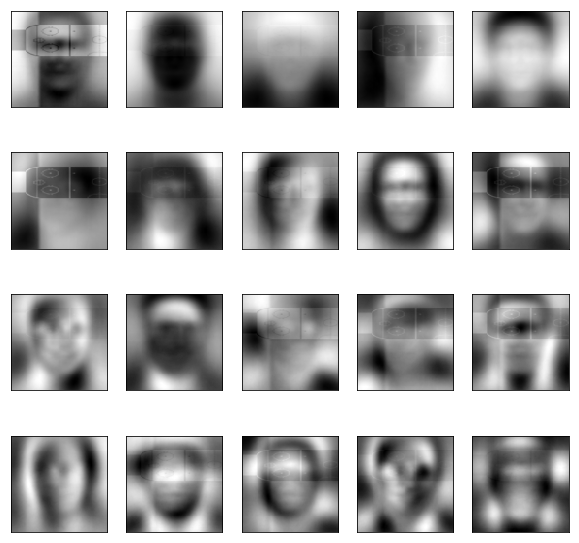

In [35]:
plot_Faces(sorted_Eigenvectors_train[:20],100,100,4,5)

Cumulative proportion of variance explained vector: 
[0.45700242 0.53201599 0.58853187 ... 0.99999995 0.99999998 1.        ]


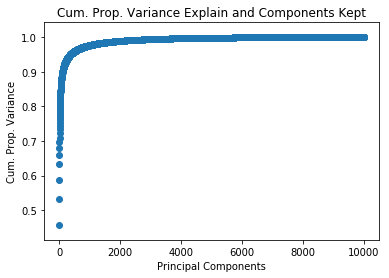

In [67]:
variance_component_sum = np.cumsum(sorted_Eigenvalues_train)/sum(sorted_Eigenvalues_train)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %variance_component_sum)

# x-axis for number of principal components kept
num_component = range(1,len(sorted_Eigenvalues_train)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance')

plt.scatter(num_component, variance_component_sum)
plt.show()

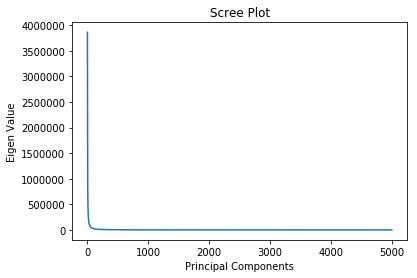

In [69]:
fig = plt.figure()
# x-axis for number of principal components kept
#num_comp = range(1,len(sorted_Eigenvalues_train)+1)
num_comp = range(1,5000)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigen Value')
plt.plot(num_comp, sorted_Eigenvalues_train[1:5000])
plt.show()

### Choose the necessary no of principle components

In [37]:
selected_PC_Train = np.array(sorted_Eigenvectors_train[:2500])

In [38]:
print("Shape of Selected Principal component:", selected_PC_Train.shape)

Shape of Selected Principal component: (2500, 10000)


In [39]:
print("Selected Principal Component:\n",selected_PC_Train)

Selected Principal Component:
 [[ 0.00143793  0.00145742  0.00147328 ...  0.00275198  0.00334339
   0.00339202]
 [-0.02219277 -0.02213245 -0.02207937 ... -0.01148748 -0.01082371
  -0.01087625]
 [-0.00442799 -0.00443385 -0.00441259 ... -0.00231201 -0.0027425
  -0.00284928]
 ...
 [ 0.00776208  0.0126428   0.01315198 ...  0.00513704  0.00356816
  -0.01113487]
 [-0.01654449 -0.01270424  0.00502645 ...  0.02593413  0.01568541
   0.00726025]
 [ 0.03243853  0.02531464  0.00311995 ... -0.00101287  0.00410408
   0.00913812]]


In [40]:
selected_PC_Test = np.array(sorted_Eigenvectors_test[:2500])

In [41]:
print("Shape of Selected Principal component:", selected_PC_Test.shape)

Shape of Selected Principal component: (2500, 10000)


In [42]:
print("Selected Principal Component:\n",selected_PC_Test)

Selected Principal Component:
 [[ 0.01194696  0.01193205  0.01191882 ...  0.00889013  0.00890353
   0.00893545]
 [-0.01584636 -0.01587424 -0.01590773 ... -0.00013993 -0.00031818
  -0.00042851]
 [-0.00640253 -0.00658348 -0.00679967 ...  0.01781329  0.01774202
   0.01745296]
 ...
 [ 0.01084323  0.00896136  0.00360962 ...  0.00902434  0.01081386
   0.0039973 ]
 [ 0.00754385  0.00930236  0.01122125 ... -0.01361052  0.00582487
  -0.00089718]
 [ 0.0223229  -0.00102248 -0.01484875 ... -0.00160221 -0.00760374
   0.00506385]]


### Lets try to find the projected data. Projected Image =  Original Image * Selected Principal Component

In [43]:
projected_trainData = np.dot(train_Data,selected_PC_Train.T)

In [44]:
print("projected image on train data:\n\n",projected_trainData)

projected image on train data:

 [[ 8.02462417e+03 -6.72308430e+03  1.59861158e+03 ... -3.04214646e+01
  -1.00098731e-01 -1.19456137e+01]
 [ 1.18861633e+04 -3.00229444e+03  8.27558981e+02 ...  3.17197880e+00
  -2.09284596e+00  1.41140441e+01]
 [ 1.00777659e+04 -4.04029857e+03  3.54666042e+03 ...  1.74701743e+01
  -1.72545964e+01 -4.75594893e+00]
 ...
 [ 8.13844449e+03 -3.31519105e+03  3.52421372e+03 ... -3.02622354e+00
  -1.88150316e+01 -1.04704376e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.87784965e+03 -2.39995202e+03  2.26199472e+03 ... -3.26186410e+00
  -9.24620818e-01 -3.12158567e+01]]


In [45]:
projected_testData = np.dot(test_Data,selected_PC_Test.T)

In [46]:
print("Projected Image on Test Data:\n\n", projected_testData)

Projected Image on Test Data:

 [[ 9.35130158e+03  1.02652966e+03  6.99356624e+01 ... -4.23534979e+00
   6.89674978e+00  1.28849013e+01]
 [ 1.43517049e+04 -3.13489256e+02  1.86358536e+03 ...  1.22927885e+01
   1.30837380e+01  3.04541694e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.14510962e+04 -1.18555254e+03  3.22597584e+02 ...  1.09354321e+01
  -1.33077763e+01 -2.90255568e+00]
 [ 1.26980367e+04  2.85347152e+03 -1.43019532e+03 ... -1.87153266e+01
   1.13090832e+01  2.87266846e+01]
 [ 1.07149586e+04  1.04293713e+03  2.10752730e+03 ...  2.57719296e+01
  -2.25862387e+01  4.74620735e+00]]


In [47]:
print("[INFO] Projected Train Data")
print("\nlength:",len(projected_trainData))
print("\nno:of:dimensions",projected_trainData.ndim)
print("\nshape:",projected_trainData.shape)

[INFO] Projected Train Data

length: 48261

no:of:dimensions 2

shape: (48261, 2500)


In [48]:
print("[INFO] Projected Test Data")
print("\nlength:",len(projected_testData))
print("\nno:of:dimensions",projected_testData.ndim)
print("\nshape:",projected_testData.shape)

[INFO] Projected Test Data

length: 12066

no:of:dimensions 2

shape: (12066, 2500)


### Funtion to perform Stochastic Gradient Descent

In [53]:
# Predicting using the weights found: - 
def predict(sample, coefficients):
    predicted_Data = coefficients[0]
    for i in range(len(sample)-1):
        predicted_Data += coefficients[i+1]*sample[i]
    return predicted_Data

In [54]:
# Compute the Weights from the train data: -
def compute_Coefficient(train_Data,epochs,learning_rate):
    coefficients = [0.0 for i in range(len(train_Data[0]))]
    for epoch in range(epochs):
        for sample in train_Data: 
            predicted_Data = predict(sample, coefficients)
            error = predicted_Data - sample[-1]
            coefficients[0] = coefficients[0] - learning_rate*error
            for i in range(len(sample)-1):
                coefficients[i+1] = coefficients[i+1] - learning_rate*error*sample[i]
        
    return coefficients

In [145]:
coefficient = []
# Perform Stochastic Gradient Descent  and compute prediction for the test data
def sgd(train_Data,test_Data,epochs,learning_rate):
    coefficients = compute_Coefficient(train_Data,epochs, learning_rate)
    coefficient.append(coefficients)
    
    predictions = []
    for sample in test_Data:
        predicted_Data   = predict(sample,coefficients)
        predictions.append(predicted_Data)
    #print("Coeff:\n", coefficient)
    #print("\n\nPredicted Age using Test Data:\n\n",predictions)
    return predictions

In [57]:
RMSE_List = []
# Compute the Root Mean Square Error
def RMS_Error(Y, Yhat):
    total = 0
    for i in range(len(Y)):
        # Error = prediction - actual 
        error = Yhat[i]-Y[i]
        # compute the square of error and return square root of its mean
        total += (np.square(error))
    RMSE = np.sqrt(total / float(len(Y)))
    return RMSE

### Normalise the train data using minmax funtion and scale the test data according to the train data 

In [52]:
#MinMaxScaler:-
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min
# Features are transformed by scaling each feature to given range. 
MinMax_Scaler = preprocessing.MinMaxScaler()
scaled_X_Train = MinMax_Scaler.fit_transform(projected_trainData)
print("Shape of Scaled/Normalized Train Data:",scaled_X_Train.shape)

Shape of Scaled/Normalized Train Data: (48261, 2500)


In [54]:
print(scaled_X_Train )

[[0.00214981 0.04631569 0.76189674 ... 0.31402456 0.56918247 0.45742105]
 [0.00318432 0.07664302 0.73692199 ... 0.44804772 0.56023384 0.57209467]
 [0.00269985 0.06818248 0.82499495 ... 0.50509127 0.49214848 0.48905865]
 ...
 [0.0021803  0.07409267 0.82426789 ... 0.4233196  0.48514119 0.50537941]
 [0.         0.10111405 0.71011697 ... 0.43539291 0.56963197 0.50998685]
 [0.00237839 0.08155258 0.78338403 ... 0.4223795  0.56547987 0.37262376]]


In [55]:
scaled_X_Test1 = MinMax_Scaler.transform(projected_testData)
print("Shape of Scaled/Normalized Test Data:",scaled_X_Test1.shape)

Shape of Scaled/Normalized Test Data: (12066, 2500)


### Adding the True value,  Age Column to the last column in both train and test data

In [56]:
train_age = np.column_stack((scaled_X_Train,train_Actual))
test_age = np.column_stack((scaled_X_Test1,test_Actual))


In [57]:
print(train_age)

[[2.14981059e-03 4.63156902e-02 7.61896743e-01 ... 5.69182468e-01
  4.57421052e-01 3.19155251e+01]
 [3.18432356e-03 7.66430197e-02 7.36921990e-01 ... 5.60233838e-01
  5.72094672e-01 2.00219178e+01]
 [2.69985078e-03 6.81824792e-02 8.24994953e-01 ... 4.92148484e-01
  4.89058647e-01 1.26326484e+01]
 ...
 [2.18030325e-03 7.40926692e-02 8.24267894e-01 ... 4.85141194e-01
  5.05379413e-01 5.66381279e+01]
 [0.00000000e+00 1.01114053e-01 7.10116969e-01 ... 5.69631972e-01
  5.09986852e-01 4.79824201e+01]
 [2.37839116e-03 8.15525787e-02 7.83384032e-01 ... 5.65479870e-01
  3.72623757e-01 2.45575342e+01]]


In [58]:
print(len(train_age[0]))

2501


In [59]:
print(test_age)

[[2.50522975e-03 1.09481068e-01 7.12382217e-01 ... 6.00602515e-01
  5.66685919e-01 3.86573059e+01]
 [3.84484640e-03 9.85588721e-02 7.70479367e-01 ... 6.28385803e-01
  5.23387987e-01 2.34906393e+01]
 [0.00000000e+00 1.01114053e-01 7.10116969e-01 ... 5.69631972e-01
  5.09986852e-01 2.65109589e+01]
 ...
 [3.06776834e-03 9.14508784e-02 7.20566055e-01 ... 5.09872074e-01
  4.97214368e-01 7.98020548e+01]
 [3.40182582e-03 1.24372064e-01 6.63792275e-01 ... 6.20416539e-01
  6.36396528e-01 2.29303653e+01]
 [2.87055582e-03 1.09614802e-01 7.78380761e-01 ... 4.68206212e-01
  5.30872191e-01 4.52554795e+01]]


### Training on Train data and function takes the test data and predicts the age using the coefficients found during training:- 

### k = 2500, No of Iteration = 25, Learning rate = 0.001

In [60]:
predictions = sgd(train_age, test_age, 25, 0.001)

Coeff:
 [[0.5490482731595111, -1.5131289203372313, 19.129132783795185, 52.90743505776306, -23.63528401638996, -31.175630417077354, -38.2379631781829, 23.46694684770424, -17.565816647975858, -1.9359067471420592, -6.264862593119713, -32.605009629423066, 7.5686973479171415, -2.4318796339126783, 0.5987680727339896, 0.35356701903871485, -6.972927374747525, -0.9568038856834058, 10.906841729532228, 9.526773869203005, 1.2570581676585793, 14.425014088076464, -4.907287222437406, 9.065870370550966, 5.454053954786163, 7.238447801903746, -4.028538277570175, -3.3409058076258678, 3.745065436974989, 0.08962281859112929, 0.10174896237574807, -4.66054029636415, -2.056254763808608, 2.3564138181259904, 5.349169298333898, 5.547232715566559, -3.9007729879168753, 4.186134577477923, -4.870889257273296, -2.6635253027325128, 1.9496445509711395, 1.0969317904898122, 2.5504657430356508, 0.8149207064025771, -5.735543385708547, 5.039579233408136, -3.3407363127337435, -0.9577995498514349, 9.04168949141695, 5.72525844

In [63]:
rmse = RMS_Error(predictions,test_Actual)
print("Root Mean Square of Test Data:\n",rmse)
RMSE_List.append(rmse)

Root Mean Square of Test Data:
 [24.99197537]


### Load Wiki_JudgeX Mat File and extract ID, FullPath

In [64]:
metaData = loadmat("wiki_judgeX.mat",squeeze_me=True, struct_as_record=True)
# Extract full path from the structered data
full_path_judgeX = metaData['wiki_judgeX']['full_path'].item(0)
ID = metaData['wiki_judgeX']['ID'].item(0)

In [97]:
# Load Wiki_Judge_Images

In [65]:
def load_image_judgeX(full_path):
    
    images = []
    full_path_dir = "/home/paperspace/Documents/PA2/wiki_judge_images/"
    for i in range(len(full_path)): 
        file = os.path.join(full_path_dir,str(full_path[i]))
          
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)#.astype(np.float64)
        # resizing the image
        image = image.flatten()
        # converting the image matrix into an image array
        images.append(image)
                
    images_judgeX = np.asarray(images)
    return images_judgeX     
                
        
    

In [101]:
print("Wiki Judge Image file Name:\n\n",full_path_judgeX)

Wiki Judge Image file Name:

 ['1.png' '2.png' '3.png' ... '1999.png' '2000.png' '2001.png']


In [99]:
print("ID\n",ID)

ID
 [   1    2    3 ... 1999 2000 2001]


In [68]:
images_judgeX = load_image_judgeX(full_path_judgeX)

In [98]:
print("\n\n Wiki_Judge_Image:\n\n\n",images_judgeX)



 Wiki_Judge_Image:


 [[ 89 107 118 ...  49  67  78]
 [161 161 161 ... 114 114 114]
 [231 231 230 ... 223 224 224]
 ...
 [ 76  74  69 ...  69  68  61]
 [ 23  22  22 ... 113 105  97]
 [103 103 102 ... 108 114  98]]


In [70]:
# Subtract the train image mean from the judge images:
centralised_judge_data = np.ndarray(shape=(len(images_judgeX), height*width))
for img in range(len(images_judgeX)):
    centralised_judge_data[img]= np.subtract(images_judgeX[img], meanImage_train)


In [102]:
print("Centralised Judge Image:\n\n",centralised_judge_data)

Centralised Judge Image:

 [[ -8.61041006   9.56418226  20.77793664 ... -44.03381612 -26.20428503
  -15.59203083]
 [ 63.38958994  63.56418226  63.77793664 ...  20.96618388  20.79571497
   20.40796917]
 [133.38958994 133.56418226 132.77793664 ... 129.96618388 130.79571497
  130.40796917]
 ...
 [-21.61041006 -23.43581774 -28.22206336 ... -24.03381612 -25.20428503
  -32.59203083]
 [-74.61041006 -75.43581774 -75.22206336 ...  19.96618388  11.79571497
    3.40796917]
 [  5.38958994   5.56418226   4.77793664 ...  14.96618388  20.79571497
    4.40796917]]


In [72]:
projected_judgeData = np.dot(centralised_judge_data,selected_PC_Train.T)

In [73]:
print(projected_judgeData)

[[-6.49989518e+02 -6.94708993e+01  1.27494866e+03 ...  5.04994476e+00
   4.39062453e+00  9.94104842e+00]
 [ 2.65095238e+03 -1.64905030e+03  2.66837509e+02 ...  8.15014124e+00
   8.21710309e+00 -1.99117918e+01]
 [ 5.11880715e+03 -3.09549834e+03 -3.77023338e+03 ...  7.74802909e+00
  -7.95774990e+00 -1.75681376e+01]
 ...
 [ 2.09233204e+03  3.24595381e+02  2.12332587e+03 ... -1.35220106e+01
   2.80076815e+00 -3.70582768e+01]
 [ 2.37050923e+03 -1.74767198e+03  1.83995116e+03 ... -2.46572462e+01
  -7.28383575e+01 -9.89449320e+00]
 [ 1.33957598e+03 -1.29814174e+03  8.28900756e+02 ...  1.06708740e+01
   6.54409487e+01  2.45863072e+00]]


In [103]:
# NOrmalise using minmax function
MinMax_Scaler = preprocessing.MinMaxScaler()
scaled_judgeData = MinMax_Scaler.fit_transform(projected_judgeData)
print("Shape of Scaled/Normalized judge Data:",scaled_judgeData.shape)

Shape of Scaled/Normalized judge Data: (2001, 2500)


### Predicting Age using coefficients and scaled data of judge images 

In [87]:
coefficient = np.asarray(coefficient)
predicted_Age = np.dot(scaled_judgeData,coefficient[:,:-1].T)

In [104]:
print("Predicted Age of 2001 facial images \n\n\n",predicted_Age)

Predicted Age of 2001 facial images 


 [[62.17317987]
 [49.64285304]
 [38.49085585]
 ...
 [32.65970973]
 [56.31742122]
 [60.30979087]]


In [90]:
ID_t = np.transpose([ID])

In [91]:
df=pd.DataFrame(ID_t,columns=['ID'])
df['AGE']= predicted_Age

In [105]:
print("Showing ID and predicted Age of 2001 facial images:\n\n")
df

Showing ID and predicted Age of 2001 facial images:




,ID,AGE
0,1,62.173180
1,2,49.642853
2,3,38.490856
3,4,59.734090
4,5,37.698815
5,6,30.805795
6,7,27.511262
7,8,32.291765
8,9,35.449048
9,10,41.739435


In [106]:
# Save result to submission.csv and submit to kaggle
df.to_csv('submission.csv', index = False, quoting=csv.QUOTE_NONNUMERIC)